In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data

* CIFAR-10 is a dataset of 50,000 - 32x32 color training images, labelled over 10 categories, and 10,000 test images

In [3]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 143s 1us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

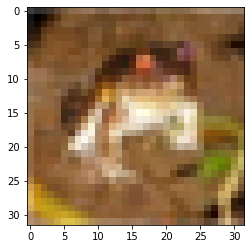

In [8]:
plt.imshow(x_train[0])

### PreProcessing

In [10]:
x_test[0].max()

255

#### `scaling the train and test data (x_train, x_test)`

In [11]:
x_train = x_train/255
x_test = x_test/255

#### `Labels`

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

##### Now if we look at the data type of y_train those values are just integers which means the model will consider them as continuous values

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train, 10)

In [16]:
y_cat_test = to_categorical(y_test, 10)

#### `Reshape the data`

* No need to reshape the data here unlike what we did with MNIST data

--------
--------

x is an image

y is a label that tells whether passed-in x is a dog or deer etc., in terms of numbers and yes after converting to categorical it will display an array of dummy variables

--------
--------

### Create a Model

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

* `No.of data points in a single image`

In [21]:
28*28

784

In [22]:
32*32*3

3072

##### Hence we re require more convolutional and pooling layers

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

'''
Often the convolutional layers will get more complex as they go along

Hence, we often increase the no.of filters in the upcoming layers

'''
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

''' 
Because of the added complexity of the no.of points here

We want to add more no.of neurons in the dense layers

'''

model.add(Dense(256, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [27]:
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=15, callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 45s 901us/sample - loss: 1.4946 - accuracy: 0.4592 - val_loss: 1.2440 - val_accuracy: 0.5570
Epoch 2/15
50000/50000 [==============================] - 39s 787us/sample - loss: 1.1675 - accuracy: 0.5885 - val_loss: 1.1400 - val_accuracy: 0.5923
Epoch 3/15
50000/50000 [==============================] - 38s 762us/sample - loss: 1.0308 - accuracy: 0.6394 - val_loss: 1.0402 - val_accuracy: 0.6346
Epoch 4/15
50000/50000 [==============================] - 39s 771us/sample - loss: 0.9254 - accuracy: 0.6790 - val_loss: 0.9797 - val_accuracy: 0.6592
Epoch 5/15
50000/50000 [==============================] - 39s 783us/sample - loss: 0.8344 - accuracy: 0.7076 - val_loss: 0.9700 - val_accuracy: 0.6666
Epoch 6/15
50000/50000 [==============================] - 39s 784us/sample - loss: 0.7540 - accuracy: 0.7344 - val_loss: 0.9921 - val_accuracy: 0.6666
Epoch 7/15
50000/50000 [====================

### Saving the Model

In [28]:
model.save('cifar_10epochs.h5')

### Model Evaluation

In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [36]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.494624,0.45924,1.243951,0.5570
1,1.167466,0.58848,1.139969,0.5923
2,1.030774,0.63936,1.040181,0.6346
3,0.925360,0.67902,0.979717,0.6592
4,0.834447,0.70764,0.969952,0.6666
5,0.753978,0.73442,0.992125,0.6666
6,0.683281,0.76162,1.005526,0.6685
7,0.615354,0.78468,0.987589,0.6767


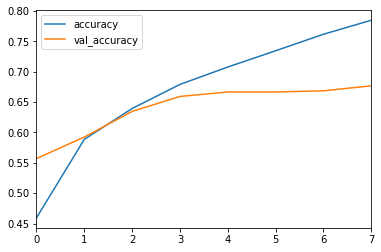

In [34]:
metrics[['accuracy','val_accuracy']].plot()

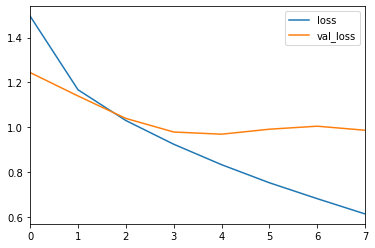

In [35]:
metrics[['loss','val_loss']].plot()

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))
print(model.evaluate(x_train, y_cat_train, verbose=0))

['loss', 'accuracy']
[0.987588731098175, 0.6767]
[0.5093785211372376, 0.8241]


##### The above result is the same as the last row values of `metrics` variable we used earlier

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
predictions = model.predict_classes(x_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.85      0.68      0.75      1000
           2       0.64      0.55      0.59      1000
           3       0.52      0.39      0.45      1000
           4       0.64      0.61      0.63      1000
           5       0.52      0.66      0.58      1000
           6       0.78      0.74      0.76      1000
           7       0.72      0.76      0.74      1000
           8       0.73      0.82      0.77      1000
           9       0.65      0.83      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



##### When we look at class no.3 and 5 it's not performing that well that's because when we blur the image so that it's size is very small it's just 32x32. Cats and dogs look really similar to a computer

In [42]:
print(confusion_matrix(y_test, predictions))

[[727  17  45  14  16   8  12  17  84  60]
 [ 37 675  10  13   5   8  12   4  54 182]
 [ 61   8 554  63  93  90  50  35  24  22]
 [ 17  10  61 392  67 267  53  63  32  38]
 [ 20   3  55  55 614  89  32  96  21  15]
 [  9   4  51 112  51 656  21  54  16  26]
 [  7   5  41  72  50  45 743   7  13  17]
 [ 12   4  28  22  50  70   6 762   7  39]
 [ 52  21  12   7   5  14  11   6 817  55]
 [ 28  44   8   6   5   8   8  17  49 827]]


(10, 0)

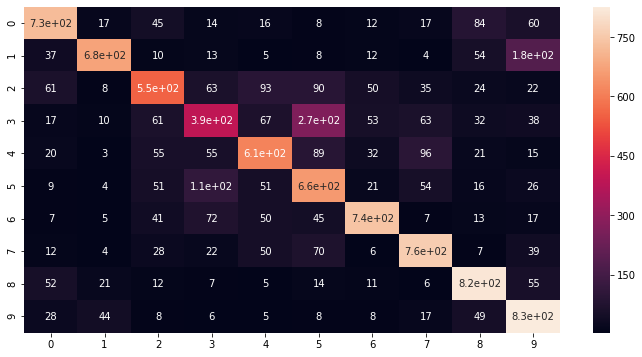

In [43]:
plt.figure(figsize=(12,6))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

plt.ylim(10,0)

##### Based on the color from the above graph we could see that there is a confusion between class no.3 and class no.5

### Predicting on a given image

In [44]:
my_image = x_test[0]

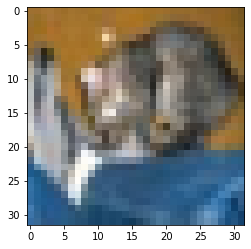

In [45]:
plt.imshow(my_image)

##### Let's see what our actual label is for that image

In [46]:
y_test[0]

array([3], dtype=uint8)

##### Actual label is showing that it is a cat i.e., class no.3

##### Now let's see what our model is going to predict

In [47]:
model.predict_classes(my_image.reshape(1, 32, 32, 3))     # shape >>> (num_images, width, height, num_color_channels)

array([3], dtype=int64)

##### So our model predicted correctly on the given image

* [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)